# Исследование данных о продажах видеоигр

Cтоит задача найти закономерности и факторы, определяющие успешность игры, что позволит сделать ставку на потенциально популярный продукт и провести успешную рекламную кампанию интернет-магазина.

# Загрузка и изучение данных

Загрузим необходимые для работы библиотеки, объявим константы и функции:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
   games = pd.read_csv('/Users/osipovamichilina/Documents/games.csv')

except:
   games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
def sales_hor(table, platform, category, main):
    """Строит горизонтальную диаграмму (bar plot) суммарных продаж игр по выбранной группировке
    
    Аргументы:
    table - переменная с датафреймом, по которому нужно построить данные 
    platform - наименование платформы из столбца platform (в виде строки string)
    category - категория (столбец), в разрезе которой нужно построить график продаж (в виде строки string)
    main - заголовок графика (в виде строки string)
    """
    
    df = [table['platform'] == platform]
    
    pivot = table.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    pivot = pivot.sort_values(by='total_sales')
    
    figure = pivot.plot(y='total_sales', kind='barh', figsize=(10, 5))
    figure.set_xlabel('Общие продажи, миллионы проданных копий')
    figure.set_title(f'{str(main)} ({platform})')
    figure.get_legend().remove()
    plt.show()

In [9]:
def sales_by_x(table, platform, category, main):
    """Строит столбиковую диаграмму (bar plot) суммарных продаж игр по выбранной группировке
    
    Аргументы:
    table - переменная с датафреймом, по которому нужно построить данные 
    platform - наименование платформы из столбца platform (в виде строки string)
    category - категория (столбец), в разрезе которой нужно построить график продаж (в виде строки string)
    main - заголовок графика (в виде строки string)
    """
    
    df = table[table['platform'] == platform].groupby(category)['total_sales'].sum()
    
    figure = df.plot(y='total_sales', kind='bar', figsize=(10, 5))
    figure.set_ylabel('Общие продажи, миллионы проданных копий')
    figure.set_title(f'{str(main)} ({platform})')
    plt.show()

В датасете большой объем данных. Кроме того, имеются пропуски в некоторых столбцах, 
не исключены аномальные значения. Нужна предобработка данных)

# Подготовка данных

Заменим названия столбцов, приведем к нижнему регистру

In [10]:
games.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [11]:
games.columns = games.columns.str.lower()

In [12]:
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Выведем общую информацию о датафрейме games с помощью метода info():

In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Обработка пропусков

Просмотрим **количество пропусков** в столбцах:

In [14]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [15]:
games.isna().sum().sort_values()/games.shape[0]*100

platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
name                0.011965
genre               0.011965
year_of_release     1.609333
user_score         40.089740
rating             40.478612
critic_score       51.319174
dtype: float64

<br>**Обработаем пропущенные** значения:

In [16]:
games = games.dropna(subset=['name']).reset_index(drop=True)

In [17]:
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)

In [18]:
games['rating'] = games['rating'].fillna('no rating')
games['genre'] = games['genre'].fillna('no genre game')

<br>Просмотрев информацию о пропущенных значениях, считаю, что рационально и корректно заполнить эти данные на базе значений в прочих столбцах не представляется возможным:
- `game_name` - заполнить эти пропуски невозможно, т.к. наименование у игры может быть абсолютно любым, поэтому данные строки удалим;
- `year_of_release` - заполнить эти пропуски невозможно без ручной обработки каждой игры, поэтому удалим эти данные; отдельной игры 
- `critic_score` - заполнить нецелесообразно теоретически возможно заполнить данные пропуски медианами или средним арифметическим, но это будет крайне некорректным, т.к. оценка у критиков может быть любой и она никак не связана ни с какими данными из прочих столбцов,заполним их заглушками.
- `user_score` - аналогично столбцу `critic_score` - невозможно,заполним их заглушками.
- `rating` - аналогично столбцу `critic_score` - невозможно, заполним пропуски как no rating для будущего расчета рейтинга ESRB.
- `genre` - аналогично столбцу `critic_score` - невозможно, заполним пропуски как no genre game.

In [19]:
games['rating'].unique()

array(['E', 'no rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
    По ретингу организации ESPB игры рейтингуют по возрастному цензу, так:
    «E» («Everyone») — Для всех
    «EC» («Early childhood») — Для детей младшего возраста
    «E10+» («Everyone 10 and older») — Для всех от 10 лет и старше
    «T» («Teen») — Подросткам
    «M» («Mature») — Для взрослых
    «AO» («Adults Only 18+») — Только для взрослых
    «RP» («Rating Pending») — Рейтинг ожидается
    «К-А» («Rating Pending») — Для детей и взрослых
    
    В столбце `rating_type` все указанные категории указаны, кроме строк с пропусками, которые составляют порядка 40%.
    При этом заполнение их считаю некорректным. На мой взгляд данные пропуски связаны с тем, что по сути ESRB, как организация 
    рейтингует игры в США и Канаде. Так как датасет включает игры в которые играют в Европе и Японии, возможно, 
    часть игр осталась вне рейтинга ESRB. У Европы своя рейтинговая организация компьютерных игр и видеоигр это PEGI, 
    в Японии это CERO. Таким образом, пропуски будем относить к играм вне рейтинга.
    </div>

### Обработка аномалий и изменение типов данных

В столбце `user_score` встречаются значения `tbd`. Скорее всего в момент заполнения данных данные об оценке игроков у игры ещё были неизвестны - изменим все значения `tbd` в данном столбце на пустые значения

In [20]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)

Изменим **типы данных** в столбцах на более подходящие и затем проверим правильность изменения данных:
- `year_of_release` — `float64` на `int16`;
- `user_score` — изменим тип на `float16` чтобы удостовериться, что строковые значения `tbd` нас больше не побеспокоят.

In [21]:
games['year_of_release'] = games['year_of_release'].astype('int16')

In [22]:
games['user_score'] = games['user_score'].astype('float16')

In [23]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float16
 10  rating           16444 non-null  object 
dtypes: float16(1), float64(5), int16(1), object(4)
memory usage: 1.2+ MB


### Создание новых столбцов

Создадим **новый столбец** `total_sales` как сумму продаж во всех регионах  

In [24]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [25]:
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.296875,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


## Исследовательский анализ данных

### Динамика количества выпущенных игр по годам

In [26]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.296875,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


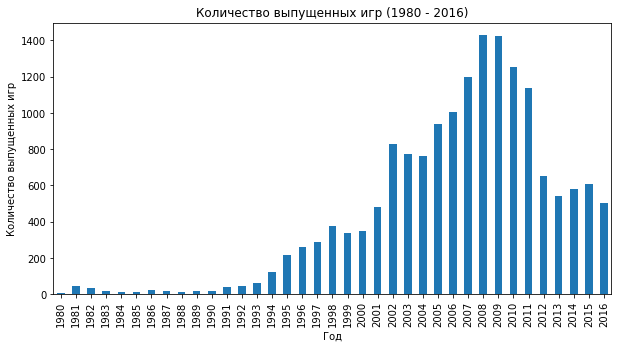

In [27]:
games_by_year = games.groupby('year_of_release')['name'].count()

ax = games_by_year.plot(y='name', kind='bar', figsize=(10, 5))
ax.set_xlabel('Год')
ax.set_ylabel('Количество выпущенных игр')
ax.set_title('Количество выпущенных игр (1980 - 2016)');

В целом, нам не слишком важны игры, выпущенные в 80-е и 90-е для старых консолей, т.к. предпочтения и вкусы игроков (да и индустрия видеоигр в целом) с тех пор существенно изменились - для целей прогнозирования ограничимся данными с 2000 года включительно

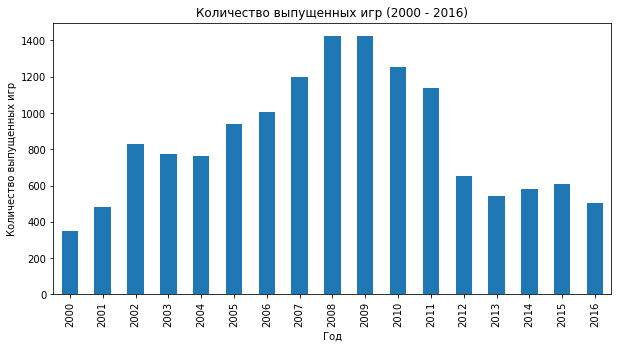

In [28]:
games_by_year = games[games['year_of_release'] >= 2000].groupby('year_of_release')['name'].count()

ax = games_by_year.plot(y='name', kind='bar', figsize=(10, 5))
ax.set_xlabel('Год')
ax.set_ylabel('Количество выпущенных игр')
ax.set_title('Количество выпущенных игр (2000 - 2016)');

### Динамика продаж игр по платформам в течение времени

In [29]:
df_platform_top = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).reset_index()

# Оставим только 10 строк в датафрейме
df_platform_top = df_platform_top.drop(df_platform_top.index[10:])

df_platform_top

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Рассмотрим динамику продаж наиболее популярных платформ и выведем в виде гистограм

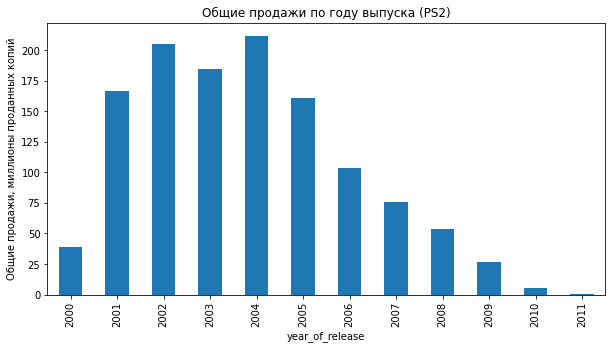

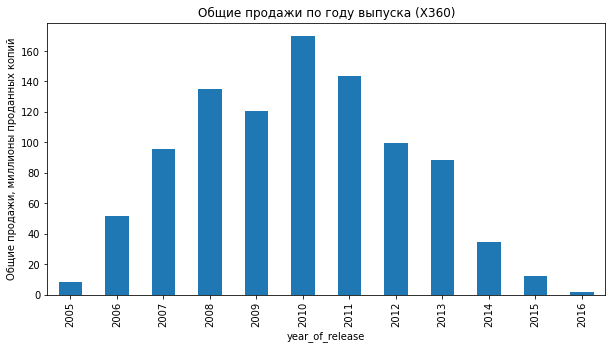

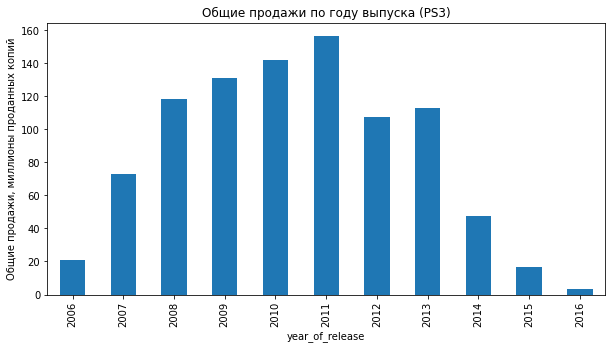

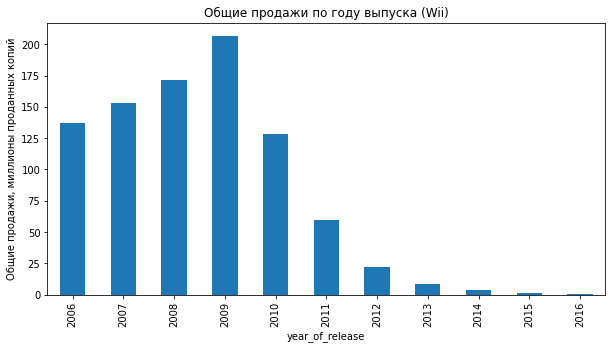

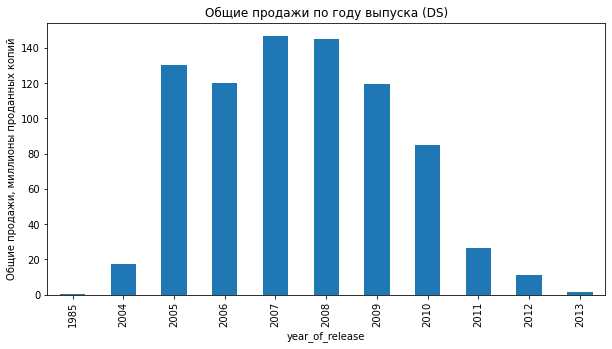

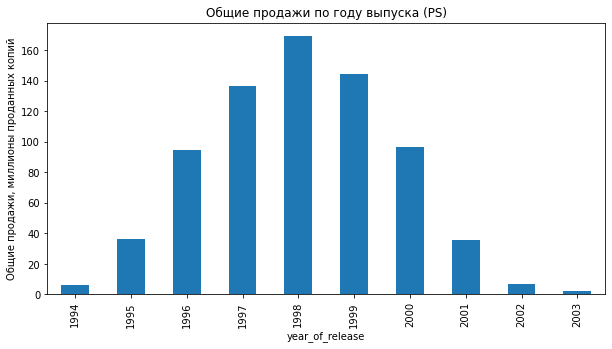

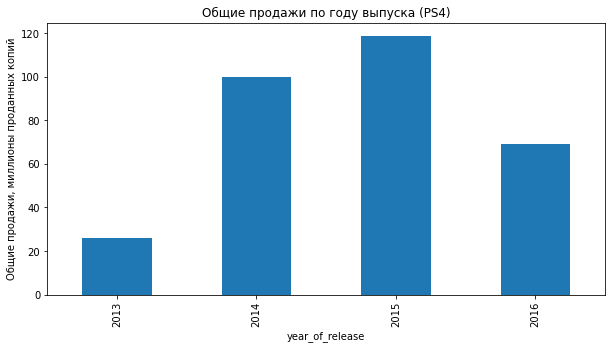

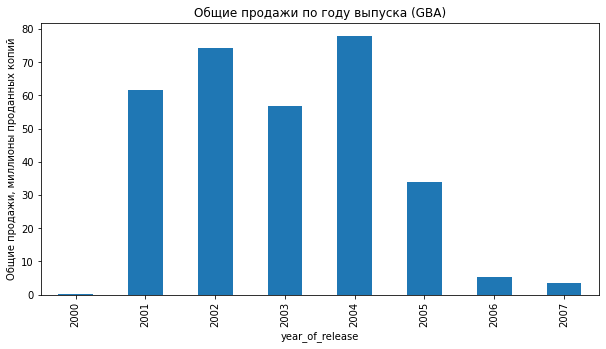

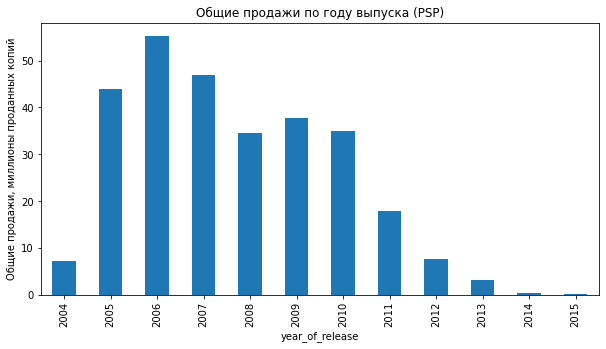

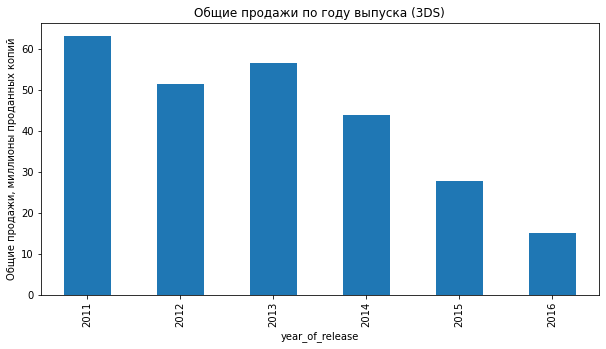

In [30]:
for platform in df_platform_top['platform'].unique():
    sales_by_x(games, platform, 'year_of_release', 'Общие продажи по году выпуска')

В целом, для целей планирования рекламной кампании нам не слишком важны игры, выпущенные в 80-е и 90-е для старых консолей наподобие NES, Genesis (Mega Drive) и оригинальной PlayStation, т.к. предпочтения и вкусы игроков (да и индустрия видеоигр в целом) с тех пор существенно изменились - начиная с года выхода по-настоящему массовой консоли PlayStation 2 с 2000 года, которая во многом и сформировала индустрию видеоигр в том виде, в каком она существует сегодня. До 2010 года индустрия видеоигр находится на пике. Касательно характерного срока появления новых консолей и исчезновения, в зависимости от успеха платформы срок ориентировочно составит 8-10 лет.

In [31]:
games_current = games[games['year_of_release'] >= 2013].reset_index(drop=True)

In [32]:
games_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int16  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float16
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float16(1), float64(6), int16(1), object(4)
memory usage: 183.3+ KB


In [33]:
games_current.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.203125,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.101562,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no rating,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.296875,M,12.62
5,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no rating,11.68
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.599609,M,10.24
7,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.599609,M,9.36
8,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,no rating,9.18
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.300781,E,8.58


Посмотрим платформы, которые остались в обновлённом датафрейме

In [34]:
games_current['platform'].value_counts()

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64

Посмотрим как обстоят дела с продажами на "актуальных" платформах, попавших в датафрейм 

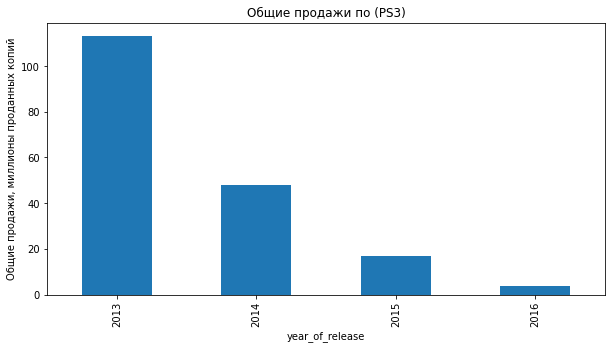

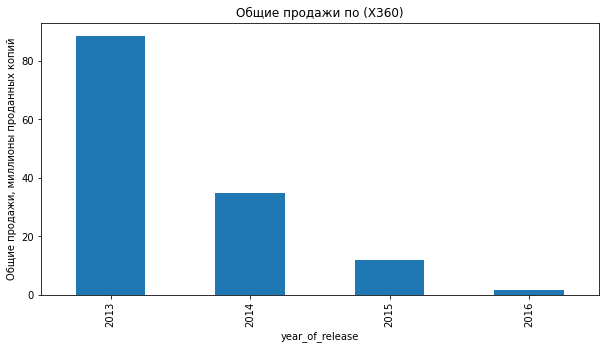

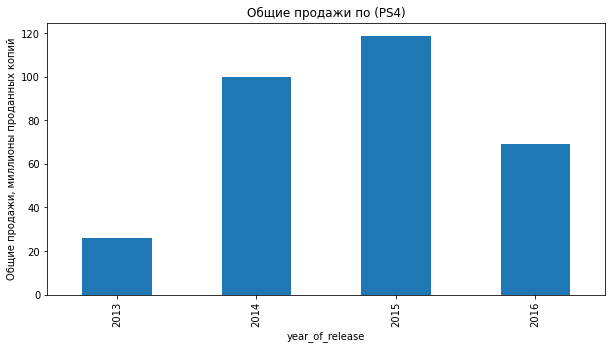

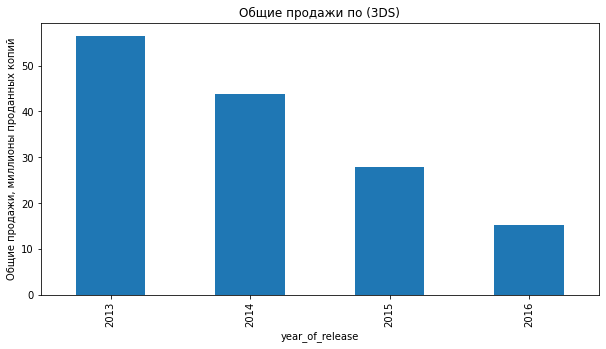

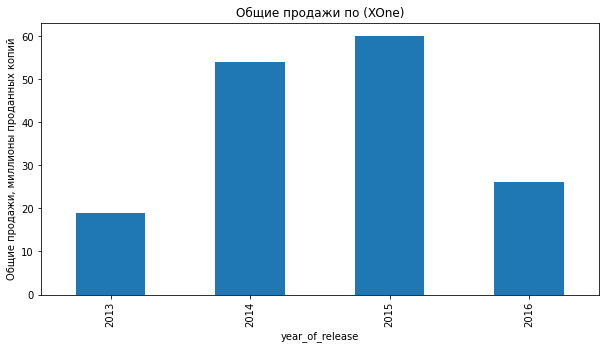

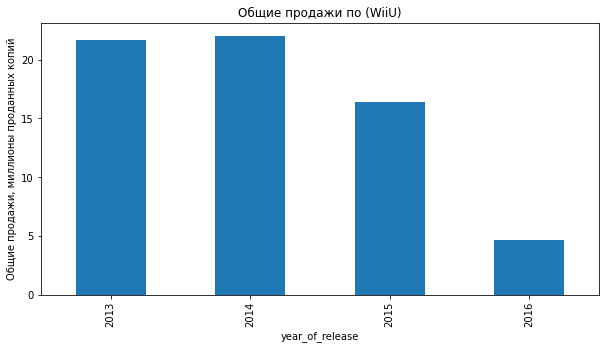

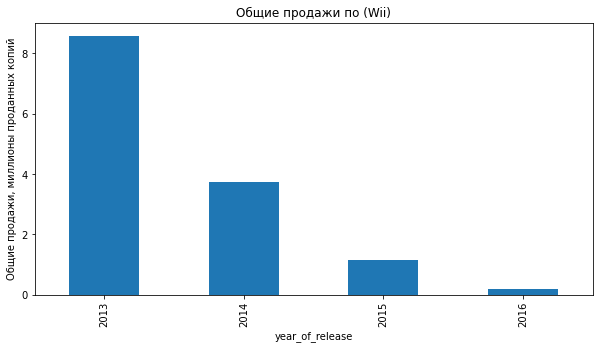

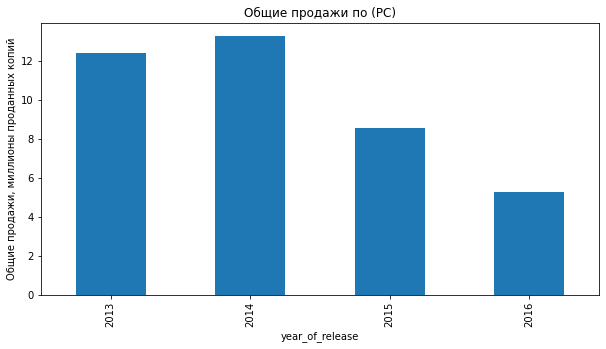

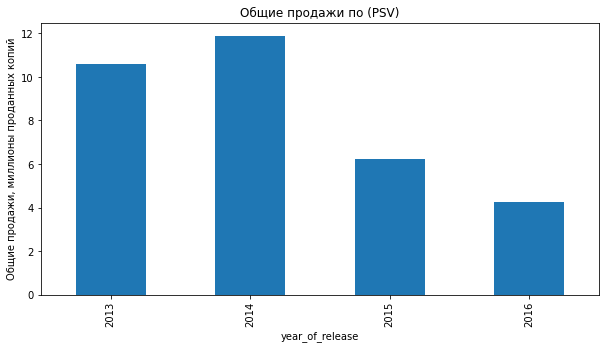

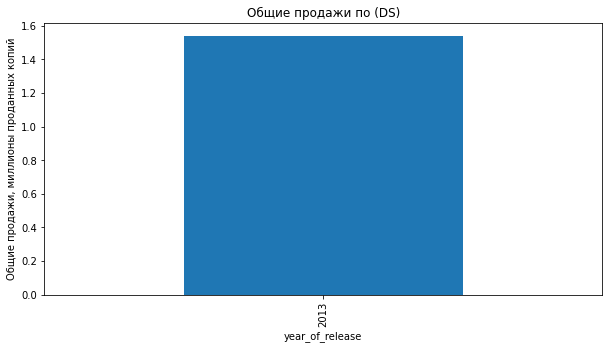

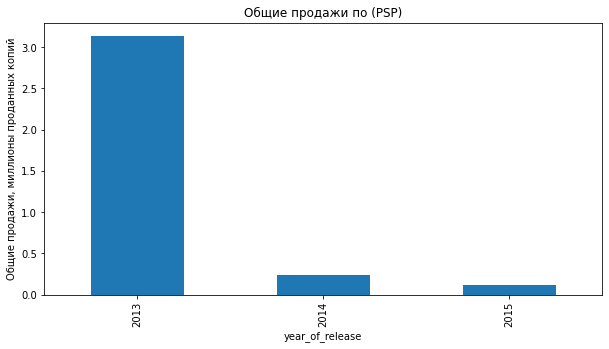

In [35]:
for platform in games_current['platform'].unique():
    sales_by_x(games_current, platform, 'year_of_release', 'Общие продажи по')

К потенциально прибыльным платформам в 2017 году можно отнести PS4 и XOne, т.к. они демонстрировали рост продаж до 2015 года, возможно в 2016 спад связан с меньшим количеством выпускаемых игр. Платформы WiiU и PC, ранее демонстрировавшие тенденцию к росту продаж, в 2015 году снизили свои коммерческие показатели, и скорее всего не будут прибыльными в 2017 году.
Платформы PSP, DS, PSV, Wii, 3DS, X360, PS3 находятся на убытии и скорее всего не будут прибыльными в 2017 году.

### Анализ "ящиков с усами"


In [36]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.128906,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499023,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.398438,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.203125,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.703125,82.540000


Построим диаграммы размаха ("ящик с усами") продаж игр на актуальных платформах

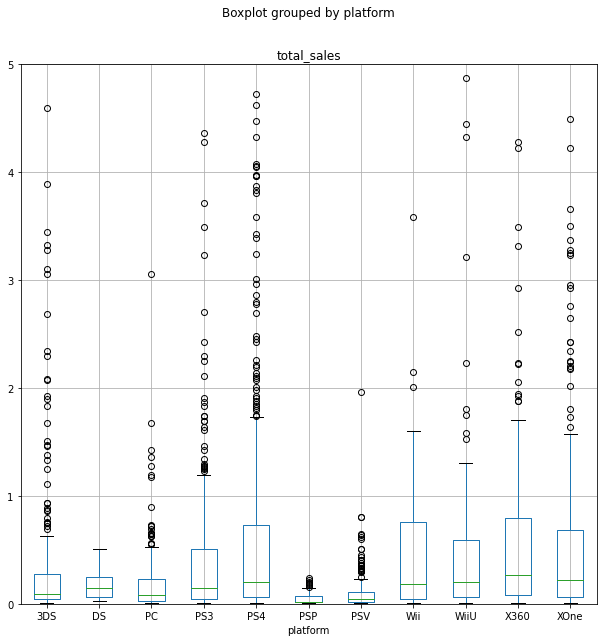

In [37]:
fig = games_current.boxplot('total_sales', by='platform', figsize=(10,10)).set_ylim(0, 5)

Просмотрев диаграммы размаха продаж игр по платформам, можно увидеть, что у платформ `PS4` и `XOne`, записанных нами в потенциально прибыльные, имеется большое количество "выбросов", т.е. игр со значительно большими продажами, нежели остальными, что указывает на большое потенциальных "хитов" выходящих на данных платформах. 

Во всех платформах мы наблюдаем смещение медианы внутри платформы по низу, то есть значение медианы ниже среднего, что говорит о том, 
что есть игры хиты, которые приносят наибольшую прибыль внутри платформы, и есть выпускаемые игры, у которых продажи значительно ниже относительно одной консоли.
Если сравнивать ящики платформы между собой, то видим, что наименьшее количество продаж фиксируется на консоли PSP, PSV.

### Влияние отзывов критиков и игроков на продажи

#### PlayStation 4

Посмотрим как влияют **отзывы** критиков на продажи игр на платформе PS4:

In [38]:
df_ps4 = games_current[games_current['platform'] == 'PS4']

0.40656790206178095


Text(0, 0.5, 'Отзывы критиков')

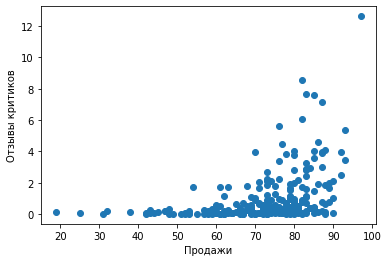

In [39]:
figure = plt.scatter(df_ps4['critic_score'], df_ps4['total_sales'])
correlation = df_ps4['critic_score'].corr(df_ps4['total_sales'])
print (correlation)
plt.xlabel('Продажи')
plt.ylabel('Отзывы критиков')

Сделаем тоже самое, но по отзывам игроков

-0.032033394722303196


Text(0, 0.5, 'Отзывы игроков')

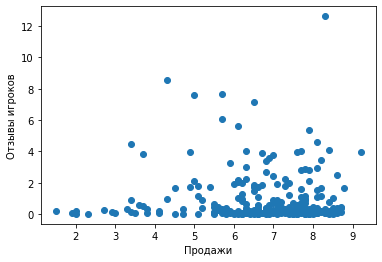

In [40]:
figure = plt.scatter(df_ps4['user_score'], df_ps4['total_sales'])
correlation = df_ps4['user_score'].corr(df_ps4['total_sales'])
print (correlation)
plt.xlabel('Продажи')
plt.ylabel('Отзывы игроков')

Имеется несильная корреляция между отзывами критиков и продажами, т.е. отзывы критиков и игроков оказывают незначительное влияния на продажи игр.

Теперь на других платформах

In [41]:
list_platform = ['PS3', 'X360', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV', 'DS', 'PSP']

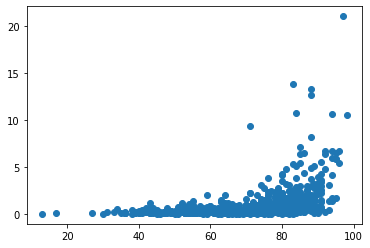

Коэффициент корреляции продажи / оценка критиков (PS3): 0.4327589578997135



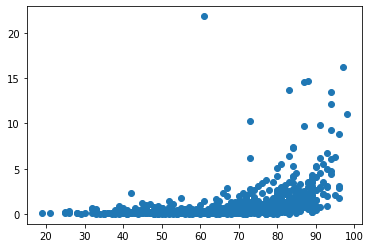

Коэффициент корреляции продажи / оценка критиков (X360): 0.39286589254006954



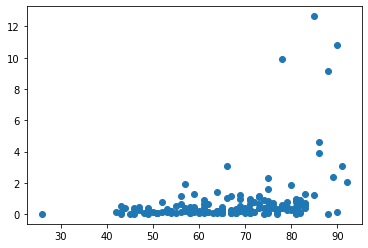

Коэффициент корреляции продажи / оценка критиков (3DS): 0.3487397305984834



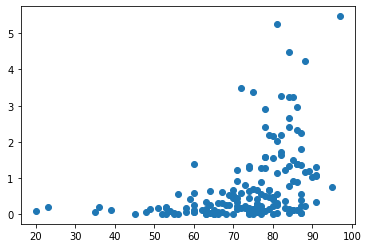

Коэффициент корреляции продажи / оценка критиков (XOne): 0.4169983280084017



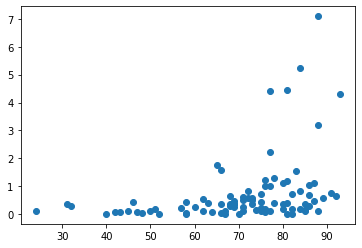

Коэффициент корреляции продажи / оценка критиков (WiiU): 0.34837976012017485



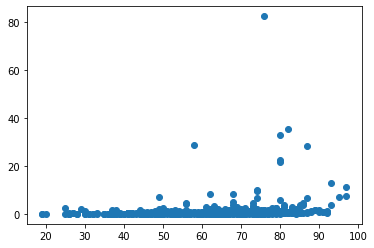

Коэффициент корреляции продажи / оценка критиков (Wii): 0.17790728577594908



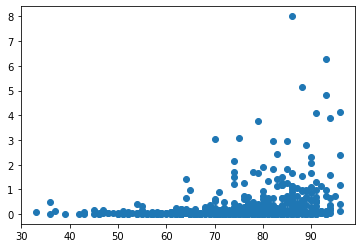

Коэффициент корреляции продажи / оценка критиков (PC): 0.257394718400985



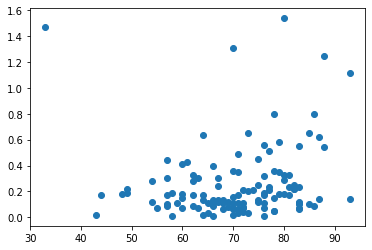

Коэффициент корреляции продажи / оценка критиков (PSV): 0.13176292727608935



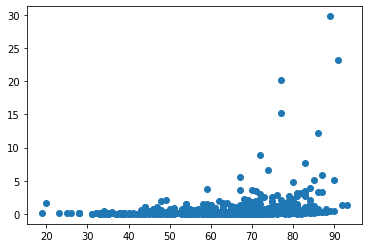

Коэффициент корреляции продажи / оценка критиков (DS): 0.23754579854113453



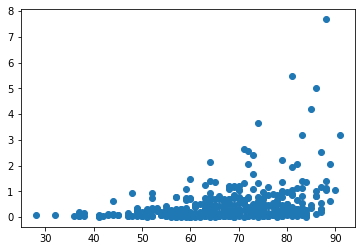

Коэффициент корреляции продажи / оценка критиков (PSP): 0.31752451005134863



In [42]:
for platform in list_platform:
    df = games[games['platform'] == platform]
    figure = plt.scatter(df['critic_score'], df['total_sales'])
    plt.show()
    correlation = df['critic_score'].corr(df['total_sales'])
    print(f'Коэффициент корреляции продажи / оценка критиков ({platform}): {correlation}')
    print()

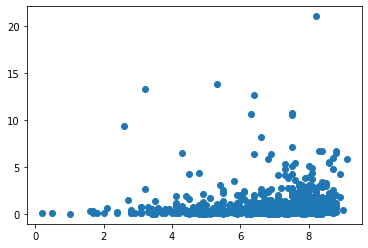

Коэффициент корреляции продажи / оценка игроков (PS3): 0.12842893459259488



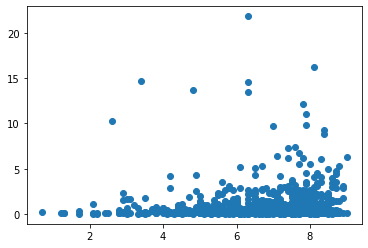

Коэффициент корреляции продажи / оценка игроков (X360): 0.11417594945102122



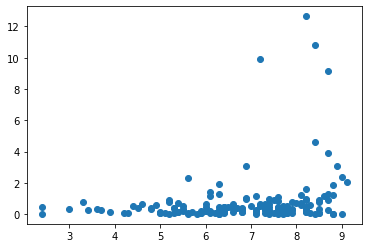

Коэффициент корреляции продажи / оценка игроков (3DS): 0.22213697725344936



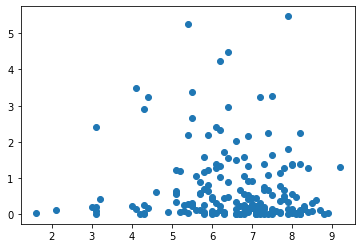

Коэффициент корреляции продажи / оценка игроков (XOne): -0.06905640851259726



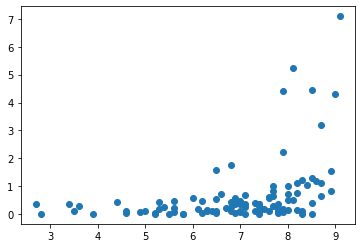

Коэффициент корреляции продажи / оценка игроков (WiiU): 0.4003158350881653



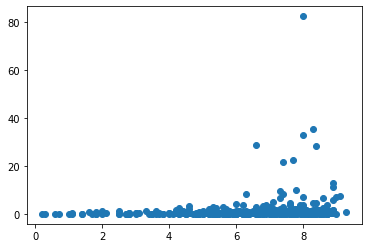

Коэффициент корреляции продажи / оценка игроков (Wii): 0.11278516833833861



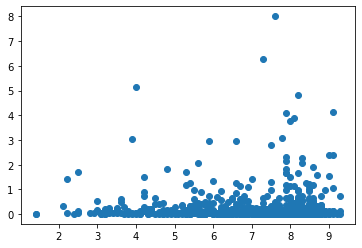

Коэффициент корреляции продажи / оценка игроков (PC): 0.012933889454589637



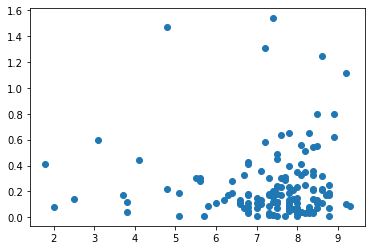

Коэффициент корреляции продажи / оценка игроков (PSV): 0.013572139647305683



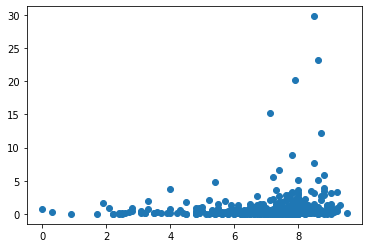

Коэффициент корреляции продажи / оценка игроков (DS): 0.13087933203288257



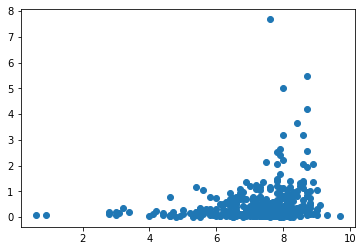

Коэффициент корреляции продажи / оценка игроков (PSP): 0.22099150292176287



In [43]:
for platform in list_platform:
    df = games[games['platform'] == platform]
    figure = plt.scatter(df['user_score'], df['total_sales'])
    plt.show()
    correlation = df['user_score'].corr(df['total_sales'])
    print(f'Коэффициент корреляции продажи / оценка игроков ({platform}): {correlation}')
    print()

Проанализировав корреляцию между оценками критиков и продажами на определённой платформе, можно сделать вывод, что корреляция слабая на платформах, а в некоторых ее практически нет

Проанализировав **корреляцию** между оценками **критиков** и **продажами** на определённой платформе, можно сделать следующие вывод:
- Слабая корреляция - платформы `PS3`, `PS4`, `X360`, `3DS`, `XOne`, `WiiU`;
- Очень слабавя корреляция - платформы `PC`, `PSV`;

В части **корреляции** между оценкой **игроков** и **продажами** на других платформах наблюдается следующая картина:
- Слабая корреляция - `WiiU`, `Wii`
- Прочие платформы - связь либо очень слабая, либо отсутствует вовсе.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [44]:
games_current.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.203125,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.101562,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no rating,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.296875,M,12.62


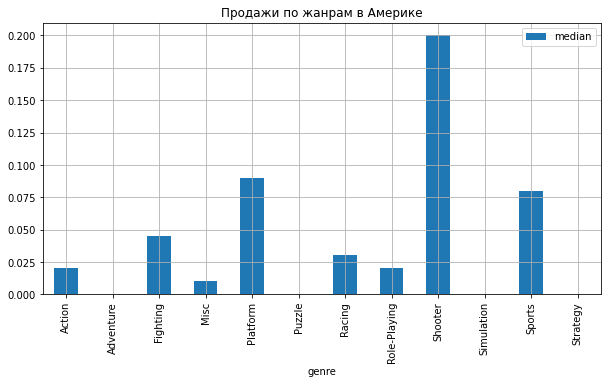

In [45]:
pivot = games_current.pivot_table(index=['genre'],values='na_sales',aggfunc=['median','mean'])
pivot.columns = ['median','mean']
pivot.reset_index().plot(x='genre',y='median',kind='bar',figsize=(10,5),grid=True)
plt.title('Продажи по жанрам в Америке')
plt.show()

В Америке лучше всего продаются игры в жанре Shooter, и почти с двойным отрывом игры в жанрах Platform, Sports.

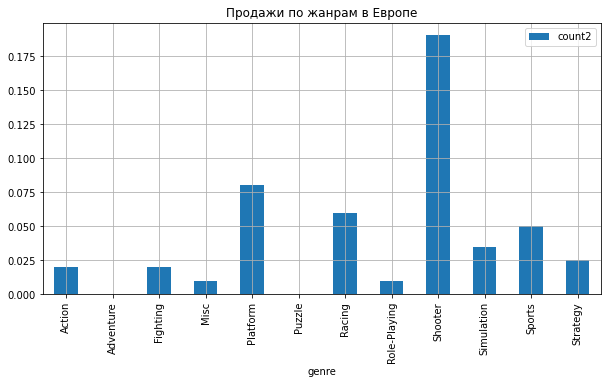

In [46]:
pivot = games_current.pivot_table(index=['genre'],values='eu_sales',aggfunc=['median', 'mean'])
pivot.columns = ['count2','sum2']
pivot.reset_index().plot(x='genre',y='count2',kind='bar',figsize=(10,5),grid=True)
plt.title('Продажи по жанрам в Европе')
plt.show()

В Европе также как в Америке лучше всего продаются игры в жанре Shooter, и на следующем месте с большим отрывом почти Platform, Racing.

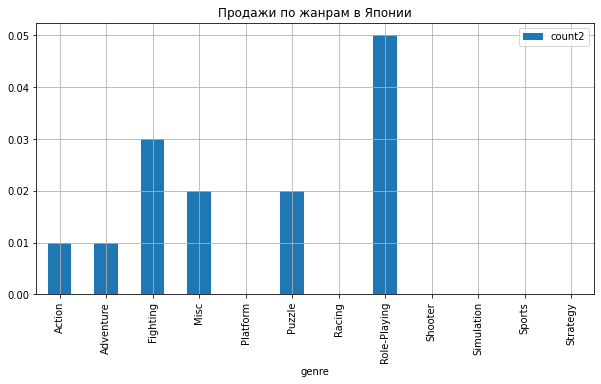

In [47]:
pivot = games_current.pivot_table(index=['genre'],values='jp_sales',aggfunc=['median', 'mean'])
pivot.columns = ['count2','sum2']
pivot.reset_index().plot(x='genre',y='count2',kind='bar',figsize=(10,5),grid=True)
plt.title('Продажи по жанрам в Японии')
plt.show()

В Японии продаются лучше всего игры в жаре Role-Playing, далее следует Fighting.

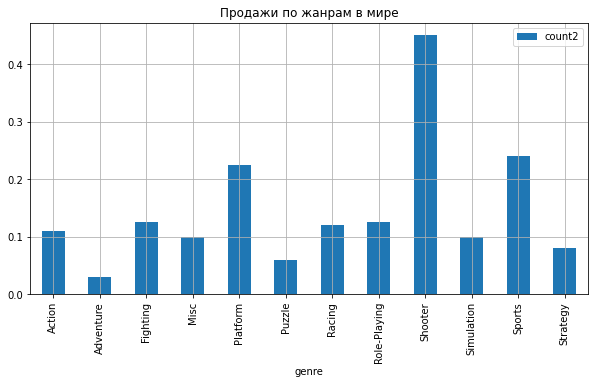

In [48]:
pivot = games_current.pivot_table(index=['genre'],values='total_sales',aggfunc=['median', 'mean'])
pivot.columns = ['count2','sum2']
pivot.reset_index().plot(x='genre',y='count2',kind='bar',figsize=(10,5),grid=True)
plt.title('Продажи по жанрам в мире')
plt.show()

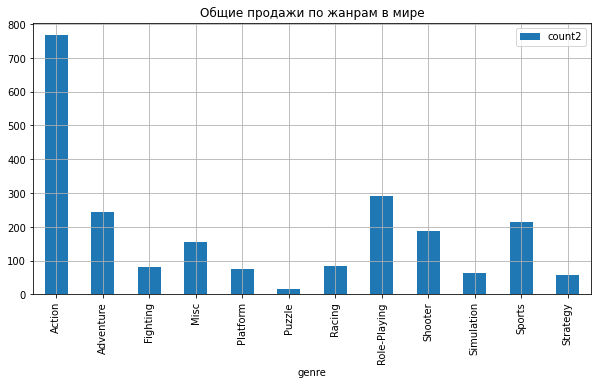

In [49]:
pivot = games_current.pivot_table(index=['genre'],values='total_sales',aggfunc=['count', 'sum'])
pivot.columns = ['count2','sum2']
pivot.reset_index().plot(x='genre',y='count2',kind='bar',figsize=(10,5),grid=True)
plt.title('Общие продажи по жанрам в мире')
plt.show()

    Высокие продажи можно отметить в жанрах Action, Role-Playing.
    Низкие продажи можно отметить в жанрах Puzzle,  Strategy, Simulation.
    Наибольшую прибыльность в мире имеют игры в жанрах Shooter, Platform, Sports.
    В разрезе по регионам картина сложилась следующим образом:
    В Америке прибыльные игры в жанре Shooter, и почти в 2 раза с меньшей прибылью игры в жанрах Platform, Sports.
    В Европе также как в Америке имеют наибольшую прибыль игры в жанре Shooter, и на следующем месте с большим отрывом Platform, Racing.
    В Японии прибыльные игры в жанре Role-Playing, далее следует Fighting.

## Портрет пользователя по регионам

### Топ-5 популярных консолей 

In [50]:
region = 'na_sales'
pivot = games_current.pivot_table(index='platform', values=region, aggfunc='sum')\
.sort_values(by=region, ascending=False)

In [51]:
pivot = pivot.drop(pivot.index[5:])

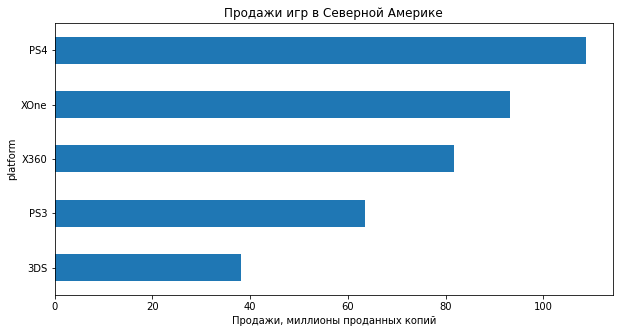

In [52]:
figure = pivot.plot(y=region, kind='barh', figsize=(10, 5))
figure.set_xlabel('Продажи, миллионы проданных копий')
figure.set_title('Продажи игр в Северной Америке')
figure.get_legend().remove()
plt.gca().invert_yaxis()
plt.show()

In [53]:
region = 'eu_sales'
pivot = games_current.pivot_table(index='platform', values=region, aggfunc='sum')\
.sort_values(by=region, ascending=False)

In [54]:
pivot = pivot.drop(pivot.index[5:])

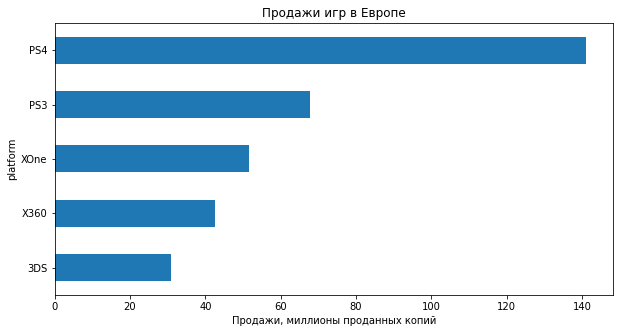

In [55]:
figure = pivot.plot(y=region, kind='barh', figsize=(10, 5))
figure.set_xlabel('Продажи, миллионы проданных копий')
figure.set_title('Продажи игр в Европе')
figure.get_legend().remove()
plt.gca().invert_yaxis()
plt.show()

In [56]:
region = 'jp_sales'
pivot = games_current.pivot_table(index='platform', values=region, aggfunc='sum')\
.sort_values(by=region, ascending=False)

In [57]:
pivot = pivot.drop(pivot.index[5:])

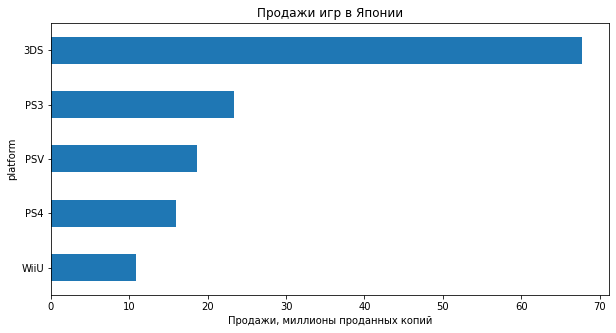

In [58]:
figure = pivot.plot(y=region, kind='barh', figsize=(10, 5))
figure.set_xlabel('Продажи, миллионы проданных копий')
figure.set_title('Продажи игр в Японии')
figure.get_legend().remove()
plt.gca().invert_yaxis()
plt.show()

In [59]:
games_current.pivot_table(index ='platform', values =['na_sales','eu_sales','jp_sales','other_sales'], aggfunc=['sum']).apply(lambda col: col/col.sum(), axis=0).style.format('{:.1%}')

В Северной Америке наиболее популярными платформами являются PS4,PS3 и XOne;
В Европе с огромным отрывом лидирует платформа PS4;
В Японии с огромным отрывом лидирует платформа 3DS.

За анализруемый период в Америке лидируют платформы `PS4` и `XOne`.
В Европе лидерство платформа `PS4` ещё более выражено: объём продаж игр для данной платформы почти вдвое больше, чем на следующих за ней платформах `PS3` и `XOne`
В Японии наблюдается совершенно иная картина - с огромным отрывом лидирует платформа `3DS`

### Топ-5 популярных жанров

<AxesSubplot:xlabel='genre'>

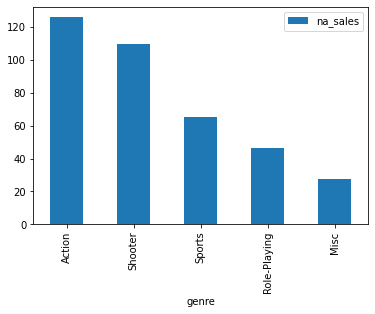

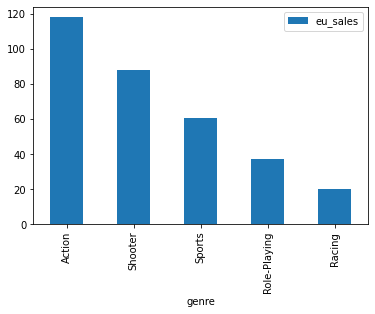

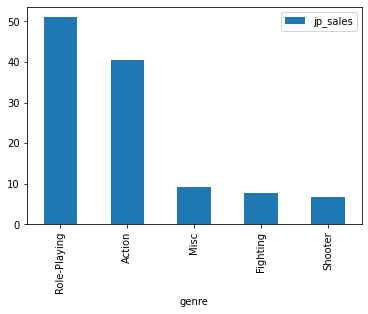

In [60]:
games_current.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
games_current.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games_current.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

В Америке и Европе лучше всего продаются игры жанров Action, Shooter и Sports;
В Японии лучше всего продаются игры жанров Role-Playing, Action и Misc.

In [61]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.296875,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


### Влияние рейтинга ESRB на продажи

In [62]:
region = 'na_sales'
pivot = games_current.pivot_table(index='rating', values=region, aggfunc='sum')\
.sort_values(by=region, ascending=False)

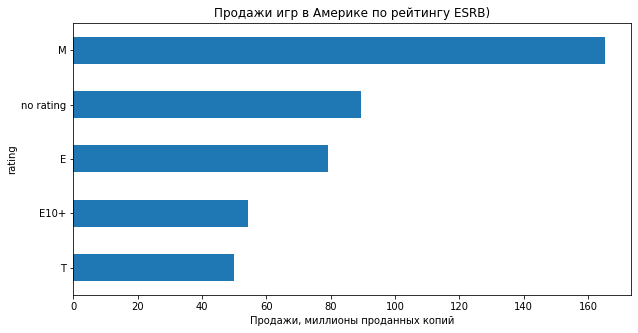

In [63]:
figure = pivot.plot(y=region, kind='barh', figsize=(10, 5))
figure.set_xlabel('Продажи, миллионы проданных копий')
figure.set_title('Продажи игр в Америке по рейтингу ESRB)')
figure.get_legend().remove()
plt.gca().invert_yaxis()
plt.show()

Игры с рейтингом M (Mature - взрослый) в Северной Америке продаются почти вдвое лучше, чем следующие за ними игры с рейтингом no rating

In [64]:
region = 'na_sales'
pivot = games_current.pivot_table(index='rating', values=region, aggfunc='sum')\
.sort_values(by=region, ascending=False)

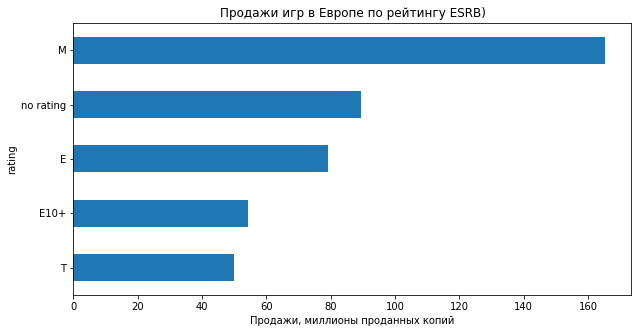

In [65]:
figure = pivot.plot(y=region, kind='barh', figsize=(10, 5))
figure.set_xlabel('Продажи, миллионы проданных копий')
figure.set_title('Продажи игр в Европе по рейтингу ESRB)')
figure.get_legend().remove()
plt.gca().invert_yaxis()
plt.show()

Как и в Северной Америке, игры с рейтингом M в Европе продаются лучше всего, однако на втором месте находятся игры категории no rating

In [66]:
region = 'jp_sales'
pivot = games_current.pivot_table(index='rating', values=region, aggfunc='sum')\
.sort_values(by=region, ascending=False)

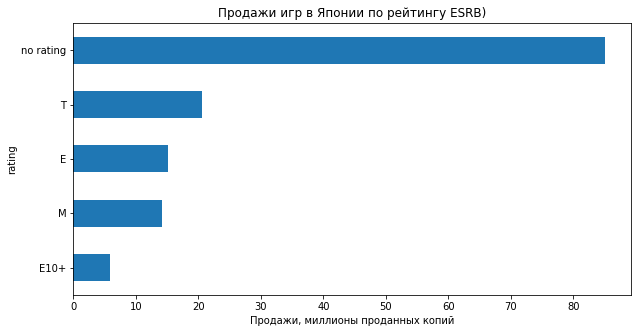

In [67]:
figure = pivot.plot(y=region, kind='barh', figsize=(10, 5))
figure.set_xlabel('Продажи, миллионы проданных копий')
figure.set_title('Продажи игр в Японии по рейтингу ESRB)')
figure.get_legend().remove()
plt.gca().invert_yaxis()
plt.show()

В Японии продаются лучше всего no rating. С большим отрывом на следующем месте категория Т для подростков.

## Проверка гипотез

H0: средний пользовательский рейтинг платформ xbox и PC одинаковый
H1: средний пользовательский рейтинг платформ xbox и PC различается

In [68]:
from scipy import stats as st

In [69]:
alpha = 0.05

In [70]:
score_player_xone = games_current[games_current['platform'] == 'XOne']['user_score'].dropna().reset_index(drop=True)
score_player_xone = score_player_xone.sample(n=50).reset_index(drop=True)

In [71]:
score_player_pc = games_current[games_current['platform'] == 'PC']['user_score'].dropna().reset_index(drop=True)
score_player_pc = score_player_pc.sample(n=50).reset_index(drop=True)

In [72]:
results = st.ttest_ind(score_player_xone, score_player_pc)

In [73]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5286921057667595
Не получилось отвергнуть нулевую гипотезу


Гипотеза о равенстве средних пользовательских рейтингов на платформах `XOne` и `PC` подтвердилась.

H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
H1: средний пользовательский рейтинг жанров Action и Sports различается

In [74]:
score_player_action = games_current[games_current['genre'] == 'Action']['user_score'].dropna().reset_index(drop=True)
score_player_action = score_player_action.sample(n=50).reset_index(drop=True)

In [75]:
score_player_sports = games_current[games_current['genre'] == 'Sports']['user_score'].dropna().reset_index(drop=True)
score_player_sports = score_player_sports.sample(n=50).reset_index(drop=True)

In [76]:
results = st.ttest_ind(score_player_action, score_player_sports)

In [77]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8515891808499197e-05
Отвергаем нулевую гипотезу


Гипотеза о равенстве средних пользовательских рейтингов жанров `Action` и `Sports` не подтвердилась: средние рейтинги двух жанров различаются.

# Общий вывод

В целом, по итогам исследования можно констатировать следующее:

Наиболее потенциально прибыльные платформы - PS4 и XOne.
Наиболее популярными жанрами на PS4 и XOne являются Action, Shooter и Sport.
Лучше всего в Америке и Европе продаются игры жанра Action, Sports Shooter, в Японии - Role-Playing.
Самой популярной платформой в Америке и Европе является PS4, в Японии - 3DS.
В Америке и Европе лучше всего продаются игры с возрастным рейтингом M, в Японии - Е.
Отзывы критиков оказывают слабое влияние на продажи игр; отзывы игроков практически не влияют на продажи.

В целом, по итогам исследования можно констатировать следующее:
- Наиболее потенциально прибыльные платформы - `PS4` и `XOne`;
- Продажи на платформах `WiiU` и `PC` выглядели потенциально прибыльными до 2015 года - на данные платформы следует обратить внимание во вторую очередь;
-   Высокие продажи в мире можно отметить в жанрах `Action`, `Role-Playing`.
    Низкие продажи можно отметить в жанрах `Puzzle`,  `Strategy`, `Simulation`.
- Наибольшую прибыльность в мире имеют игры в жанрах `Shooter`, `Platform`, `Sports`. В разрезе по регионам картина сложилась следующим образом:
    В Америке прибыльные игры в жанре `Shooter`, и почти в 2 раза с меньшей прибылью игры в жанрах `Platform`, `Sports`.
    В Европе также как в Америке имеют наибольшую прибыль игры в жанре `Shooter`, и на следующем месте с большим отрывом `Platform`, `Racing`.
    В Японии прибыльные игры в жанре `Role-Playing`, далее следует `Fighting`.
- Самой популярной платформой в Америке и Европе является `PS4`, в Японии - `3DS`;
- В Америке и Европе лучше всего продаются игры с возрастным рейтингом `M` и `no rating`, в Японии - `no rating` и `T`;
- Во всех платформах мы наблюдаем смещение медианы внутри платформы по низу, то есть значение медианы ниже среднего, что говорит о том, что есть игры хиты, которые приносят наибольшую прибыль внутри платформы, и есть выпускаемые игры, у которых продажи значительно ниже относительно одной консоли. Если сравнивать ящики платформы между собой, то видим, что наименьшее количество продаж фиксируется на консоли PSP, PSV.
- Отзывы критиков оказывают слабое влияние на продажи игр; отзывы игроков практически не влияются на продажи.